# How to Get Weather Data in Python using Meteostat
## Get weather data such as temperature, pressure, precipitation, wind direction, etc. for your next Python project.

In [1]:
from datetime import datetime
from meteostat import Point
from meteostat import Hourly 
from meteostat import Daily
from meteostat import Monthly
import pandas as pd

from prophet import Prophet
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error

In [2]:
# Set time period
start = datetime(2021, 1, 1)
end = datetime(2022, 9, 30)

In [3]:
# Create Point for Bangalore, KARNATAKA
place = Point(12.971599, 77.594566)

In [8]:
# Get hourly data
data = Hourly(place, start, end)
data = data.fetch()

In [9]:
data.head()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2021-01-01 00:00:00,17.6,15.9,90.0,NaN,NaN,50.0,3.6,NaN,1015.0,NaN,5.0
2021-01-01 01:00:00,18.0,18.0,100.0,NaN,NaN,90.0,7.6,NaN,1016.0,NaN,5.0
2021-01-01 02:00:00,18.0,18.0,100.0,NaN,NaN,90.0,7.6,NaN,1017.0,NaN,5.0
2021-01-01 03:00:00,18.8,15.3,80.0,NaN,NaN,50.0,5.4,NaN,1018.0,NaN,5.0
2021-01-01 04:00:00,21.0,16.0,73.0,NaN,NaN,90.0,14.8,NaN,1018.0,NaN,5.0


In [10]:
# Get daily data
data = Daily(place, start, end)
data = data.fetch()

In [11]:
# Show dataframe
data.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2021-01-01,20.6,16.6,25.3,0.5,NaN,93.0,10.4,NaN,1015.6,NaN
2021-01-02,20.9,16.6,26.0,0.4,NaN,74.0,11.3,NaN,1014.5,NaN
2021-01-03,21.9,18.8,26.0,0.0,NaN,86.0,12.0,NaN,1013.0,NaN
2021-01-04,20.8,18.6,27.6,0.0,NaN,84.0,10.8,NaN,1013.1,NaN
2021-01-05,21.9,18.7,26.2,0.0,NaN,83.0,10.9,NaN,1013.9,NaN


In [12]:
# Get Monthly data
data = Monthly(place, start, end)
data = data.fetch()

In [13]:
# Show dataframe
data.head()

,tavg,tmin,tmax,prcp,wspd,pres,tsun
time,,,,,,,
2021-01-01,22.6,17.7,27.6,21.0,7.3,1014.7,8640.0
2021-02-01,23.6,16.9,30.3,10.0,9.2,1014.2,12240.0
2021-03-01,26.8,19.5,34.0,0.0,9.3,1012.4,14100.0
2021-04-01,28.2,22.1,34.2,118.0,7.2,1011.3,9780.0
2021-05-01,26.9,22.1,31.8,131.0,9.8,1009.4,11220.0


## Example

In [40]:
import math
import warnings
import pandas as pd
from prophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

from meteostat import Point
from meteostat import Hourly 
from meteostat import Daily
from meteostat import Monthly

In [41]:
# Set time period
start = datetime(2021, 1, 1)
end = datetime(2022, 9, 30)

# Create Point for Bangalore, KARNATAKA
place = Point(12.971599, 77.594566)
data = Daily(place, start, end)
data = data.fetch()

In [42]:
train = data.loc[:'2022-08-31']
test = data.loc['2022-09-01':]

train.shape, test.shape

((608, 10), (30, 10))

In [43]:
train = data[['tavg']]
train = train.reset_index()
train.columns = ['ds', 'y']

In [44]:
model = Prophet()
model.fit(train)
future = pd.DataFrame(test.index.values)
future.columns = ['ds']
forecast = model.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


num_rows 6
num_columns 2
self.sorted_labels[-1] [0 1 0 1 0 1 0 1 0 1 0 1]
stride 2
comp_index [0 0 1 1 2 2 3 3 4 4 5 5]
self.lift 0
self.full_shape (6, 2)
np.prod(self.full_shape) 12
mask shape (12,)
num_rows 6
num_columns 2
self.sorted_labels[-1] [0 1 0 1 0 1 0 1 0 1 0 1]
stride 2
comp_index [0 0 1 1 2 2 3 3 4 4 5 5]
self.lift 0
self.full_shape (6, 2)
np.prod(self.full_shape) 12
mask shape (12,)
num_rows 6
num_columns 2
self.sorted_labels[-1] [0 1 0 1 0 1 0 1 0 1 0 1]
stride 2
comp_index [0 0 1 1 2 2 3 3 4 4 5 5]
self.lift 0
self.full_shape (6, 2)
np.prod(self.full_shape) 12
mask shape (12,)


In [45]:
# calculate MAE between expected and predicted values 
y_true = test['tavg'].values
y_pred = forecast['yhat'].values
rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print('RMSE:', rmse)

RMSE: 0.9931755437324493


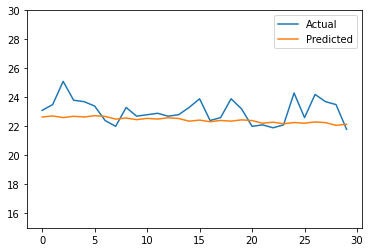

In [46]:
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.ylim(ymax=30, ymin=15)
plt.legend()
plt.show()